# <center>  Statistics of Unicorns </center>

Unicorns are startup companies have a valuation over $1 billion. <br>
CBINSIGHTS is one of the greatest source where we can find unicorns company data like "valuation, date became unicorn, country, city, industry and investors". <br>
By reading this data we will try to obtain some statistics about unicorn companies.

Import libraries will be used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

## Read Unicorns' Data

In [2]:
# we will achive unicorns statistics from CBINSIGHTS' "The Complete List Of Unicorn Companies" 
url = 'https://www.cbinsights.com/research-unicorn-companies' 
web_data = pd.read_html = pd.read_html(url)

In [3]:
# now check the web_data
web_data

[                  Company Valuation ($B) Date Joined        Country  \
 0               ByteDance           $140    4/7/2017          China   
 1                  SpaceX           $127   12/1/2012  United States   
 2                   SHEIN           $100    7/3/2018          China   
 3                  Stripe            $95   1/23/2014  United States   
 4                   Canva            $40    1/8/2018      Australia   
 ...                   ...            ...         ...            ...   
 1197          LeadSquared             $1   6/21/2022          India   
 1198            FourKites             $1   6/21/2022  United States   
 1199          VulcanForms             $1    7/5/2022  United States   
 1200          SingleStore             $1   7/12/2022  United States   
 1201  Unstoppable Domains             $1   7/27/2022  United States   
 
                City                             Industry  \
 0           Beijing              Artificial intelligence   
 1         H

In [4]:
# when we check the web_data we see that our DataFrame is inside a list. 
# To extract df we can just use list_name[0]
unicorns_data = web_data[0]

In [5]:
# now let's check df with dataframe_name.head()
unicorns_data.head(5)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


## Change Data Type For Valuation & Date Joined

In [6]:
# Using .info() method output shows that DataFrame doesn't have any null value in any of column except city and select investors.
# And data type of all columns are "object". 
unicorns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1202 non-null   object
 1   Valuation ($B)    1202 non-null   object
 2   Date Joined       1202 non-null   object
 3   Country           1202 non-null   object
 4   City              1184 non-null   object
 5   Industry          1202 non-null   object
 6   Select Investors  1201 non-null   object
dtypes: object(7)
memory usage: 65.9+ KB


In [7]:
# Change data type of "Valuation ($B)" to numeric and "Date Joined" to datetime
# To change dtype of "Valuation ($B)" to numeric firstly we have to remove '$' sign from data
unicorns_data[['Valuation ($B)']]

,Valuation ($B)
0,$140
1,$127
2,$100
3,$95
4,$40
...,...
1197,$1
1198,$1
1199,$1
1200,$1


In [8]:
# with .replace() we remove $ sign from column data
unicorns_data['Valuation ($B)'] = unicorns_data['Valuation ($B)'].replace(r'\$','', regex=True)

In [9]:
# now check DataFrame again.
unicorns_data

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1197,LeadSquared,1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1198,FourKites,1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1199,VulcanForms,1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1200,SingleStore,1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"


In [10]:
# But we have to change Valuation ($B) to float to make math operations (sum, mean, average, ...)
unicorns_data['Valuation ($B)'] = unicorns_data['Valuation ($B)'].astype('float')

In [11]:
unicorns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1202 non-null   object 
 1   Valuation ($B)    1202 non-null   float64
 2   Date Joined       1202 non-null   object 
 3   Country           1202 non-null   object 
 4   City              1184 non-null   object 
 5   Industry          1202 non-null   object 
 6   Select Investors  1201 non-null   object 
dtypes: float64(1), object(6)
memory usage: 65.9+ KB


In [12]:
# Using to_datetime we can convert Date Joined column data type to datetime
unicorns_data['Date Joined'] = pd.to_datetime(unicorns_data['Date Joined'])

In [13]:
# finally we have columns in the format we want.
unicorns_data

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1197,LeadSquared,1.0,2022-06-21,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1198,FourKites,1.0,2022-06-21,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1199,VulcanForms,1.0,2022-07-05,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1200,SingleStore,1.0,2022-07-12,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"


## Analysing Data

In [14]:
# We can use Date Joined column to get yearly data
unicorns_data['Year'] = unicorns_data['Date Joined'].dt.year

# To check montly date we can extract months from Date Joined
unicorns_data['Month'] = unicorns_data['Date Joined'].dt.month 

In [15]:
unicorns_data.head(5)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Year,Month
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,7
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1


In [16]:
# Now let's check industries of unicorns
unicorns_data.Industry.unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation', 'Travel',
       'Cybersecurity', 'Mobile & telecommunications',
       'Artificial Intelligence'], dtype=object)

We get the list above. This means our industries are
* 'Artificial Intelligence'
* 'Artificial intelligence'
* 'Auto & transportation'
* 'Consumer & retail'
* 'Cybersecurity'
* 'Data management & analytics'
* 'E-commerce & direct-to-consumer'
* 'Edtech'
* 'Fintech'
* 'Hardware'
* 'Health'
* 'Internet software & services'
* 'Mobile & telecommunications'
* 'Other'
* 'Supply chain, logistics, & delivery'
* 'Travel'

From above list we see that <b>artificial Intelligence</b> written twice as 'Artificial Intelligence' and 'Artificial intelligence'. <br>
Therefore we will replace 'Artificial Intelligence' to 'Artificial intelligence'.

In [17]:
# To replace we will use Series.str.replace() method
unicorns_data.Industry = unicorns_data.Industry.str.replace('Artificial Intelligence','Artificial intelligence')

In [18]:
# And finally it would be interesting to see investors of unicorns individually
unicorns_data.loc[:,['Investor_'+str(i) for i in range(4)]] = np.nan

In [19]:
# For this one we split unicorns_data['Select Investors'] with ','
unicorns_data.iloc[:,-4:] = unicorns_data['Select Investors'].str.split(',', expand=True)

In [20]:
unicorns_data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Year,Month,Investor_0,Investor_1,Investor_2,Investor_3
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,7,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1,Khosla Ventures,LowercaseCapital,capitalG,None
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


In [21]:
# Now we can drop Date Joined and Select Inverstors columns as we already extract information we need.
unicorns_data = unicorns_data.drop(columns=['Date Joined', 'Select Investors'])

### Statistics By Year

In [22]:
unicorn_by_year = unicorns_data.groupby(by='Year').agg(['sum', 'count'])['Valuation ($B)']

In [23]:
unicorn_by_year['average'] = unicorn_by_year['sum']/unicorn_by_year['count']

In [24]:
unicorn_by_year['average'] = unicorn_by_year['average'].apply(lambda x: ceil(x))

In [25]:
unicorn_by_year

,sum,count,average
Year,,,
2011,12.40,2,7
2012,158.00,4,40
2013,10.00,3,4
2014,160.80,12,14
2015,91.85,34,3
2016,80.17,21,4
2017,278.74,42,7
2018,577.31,97,6
2019,460.14,102,5


#### Total Investment By Year

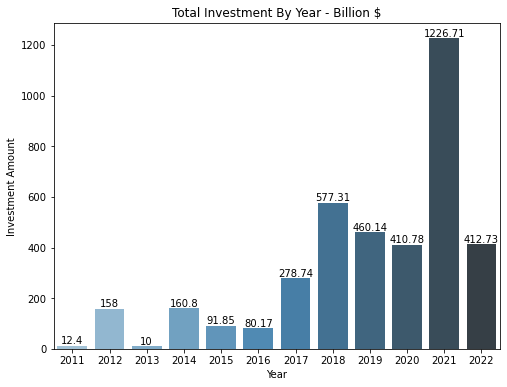

In [26]:
plt.figure(figsize=(8,6))
plt.title('Total Investment By Year - Billion $')
ax = sns.barplot(x= unicorn_by_year.index, y = unicorn_by_year['sum'], palette='Blues_d')
#sns.plot(unicorn_by_year.index, unicorn_by_year['sum'])
plt.ylabel('Investment Amount');
plt.xlabel('Year');

for label in ax.containers:
    ax.bar_label(label,)

#### Number of Unicorns By Year

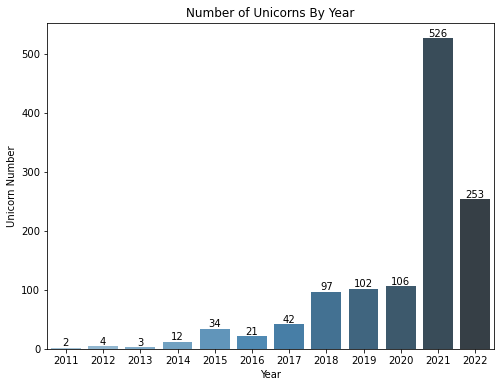

In [27]:
plt.figure(figsize=(8,6))
plt.title('Number of Unicorns By Year')
ax = sns.barplot(x=unicorn_by_year.index, y=unicorn_by_year['count'], palette='Blues_d')
plt.ylabel('Unicorn Number');
plt.xlabel('Year');

for label in ax.containers:
    ax.bar_label(label,)

#### Average Investment By Year

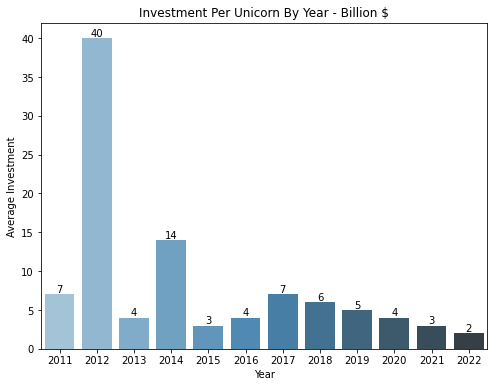

In [28]:
plt.figure(figsize=(8,6))
plt.title('Investment Per Unicorn By Year - Billion $')
ax = sns.barplot(x = unicorn_by_year.index, y = unicorn_by_year['average'], palette='Blues_d')
plt.ylabel('Average Investment');
plt.xlabel('Year');

for label in ax.containers:
    ax.bar_label(label)